In [2]:
import sys,os,re
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

os.environ['PYTHONPATH']=os.environ.get('SRC')
if not os.environ.get('SRC') in sys.path: 
    sys.path.insert(0,os.environ.get('SRC'))

sys.path.insert(0,'/home/ishah/ipynb/genra-py-kenta/src')

%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline


import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import seaborn as sns
from scipy import stats
from box import Box
import warnings

from IPython.core.display import display, HTML

warnings.simplefilter('ignore')

D1 = os.environ.get('DAT')+'/shah-2016/'
FIG_DIR = os.environ.get('FIG')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data

In [22]:
D = '/home/ishah/ipynb/ml-tox/data/outputs/ATG/'
X = pd.read_csv(D+'afp1-full-emb.csv')
Info = pd.read_csv(D+'atg-chm-info.csv').rename(columns=dict(dtxsid='ID',name='chemical_name'))
Y = pd.read_csv(D+'atg-afp-pred.csv')
X.shape,Info.shape,All_pred.shape
X.index=Info.ID

In [63]:
Info[Info.chemical_name.str.contains('Carbofu')]

,ID,smiles,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS,chemical_name
3137,DTXSID9020249,CNC(=O)OC1=CC=CC2=C1OC(C)(C)C2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Carbofuran


# Viz

In [18]:
from genra.rax.viz.nn import *


1 CNC(=O)OC1=CC=CC2=C1OC(C)(C)O2 1.3220382868674704e-14 215.90523696921022
2 CNC(=O)OC1=CC(C)=C(SC)C(C)=C1 126.88819153975457 186.7103039559543
3 CN(C)C1=CC2=C(C=C1)C(C)=CC(=O)O2 210.07036138078206 83.17273988891078
4 CCOC(=O)NCCOC1=CC=C(OC2=CC=CC=C2)C=C1 221.19074567744235 -49.44198943067644
5 CCCCOCN(C(=O)CCl)C1=C(CC)C=CC=C1CC 155.64832458302294 -165.74863080868576
6 CNC(=O)OC1=C2C=CC=CC2=CC=C1 35.63267926304143 -224.97588266895778
7 CC(C)OC(=O)NC1=CC=CC(Cl)=C1 -96.99212553063202 -206.1187586970357
8 COC1=C(NNC(=O)OC(C)C)C=C(C=C1)C1=CC=CC=C1 -196.15555993762044 -116.00607476494905
9 CCN(CC)C(=O)SCC1=CC=C(Cl)C=C1 -227.72378394454208 14.327166092612787
10 CCC1=C(N(C(C)COC)C(=O)CCl)C(C)=CC=C1 -180.64548788142085 140.12300371317926


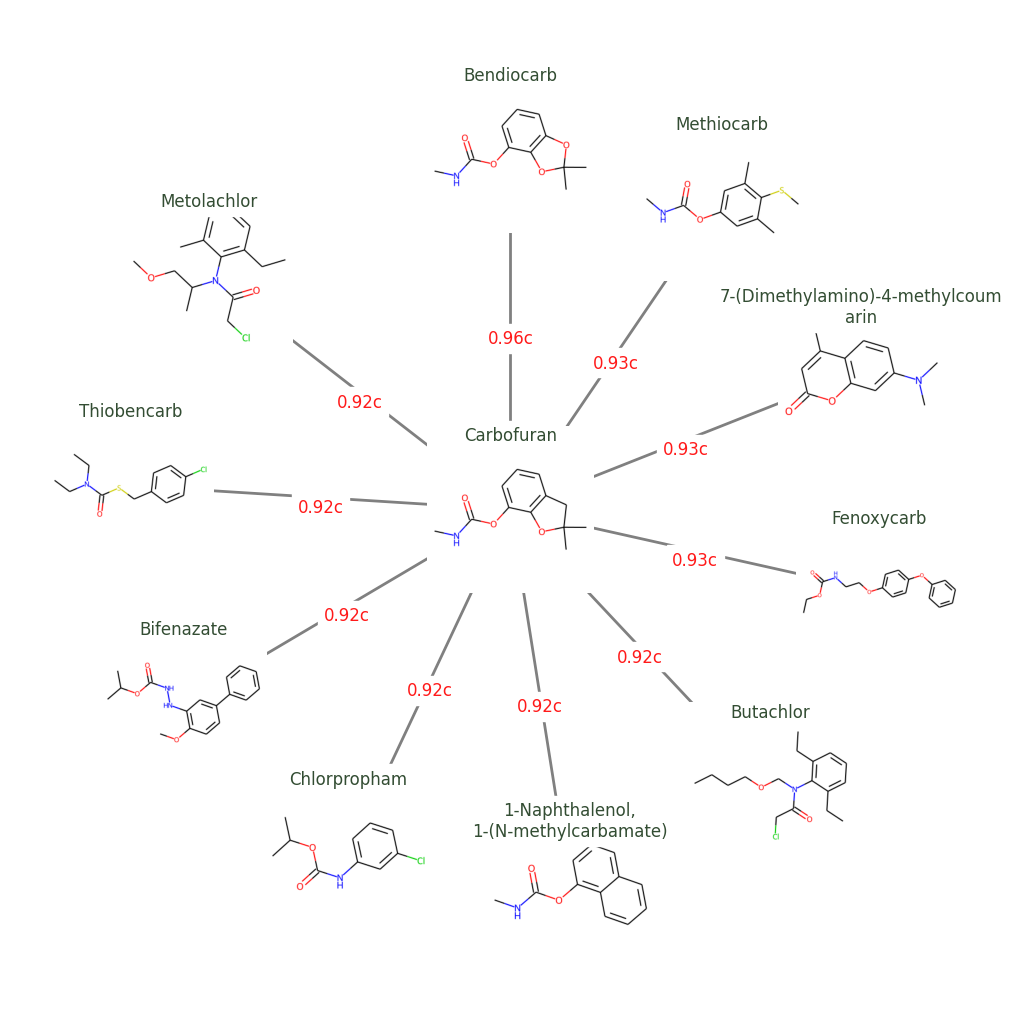

In [67]:
from genra.rax.viz.nn import *

fig = pl.figure(figsize=(13,13))
ax = pl.subplot(1,1,1)
ax.set_axis_off()
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)

target_id = 'DTXSID9020249'
GV = GenRAViewNN(rs=1.2,lw=1,ax=ax,th_tot=1.9*math.pi,
                 chm_name_font_size=12,metric='euclidean',
                   chm_sz=(100,100),r_min=200)
GV.loadData(X,Info.ATG_ERa_TRANS,Info=Info)
GV.draw(target_id,k=10)

In [68]:
GV._NN_c[['chemical_name','ATG_ERa_TRANS']]


,chemical_name,ATG_ERa_TRANS
1,Bendiocarb,1
2,Methiocarb,1
3,7-(Dimethylamino)-4-methylcoumarin,0
4,Fenoxycarb,1
5,Butachlor,1
6,"1-Naphthalenol, 1-(N-methylcarbamate)",1
7,Chlorpropham,1
8,Bifenazate,1
9,Thiobencarb,1
10,Metolachlor,1


1 [H][C@@]12CC[C@@](O)(C#C)[C@@]1(CC)CC[C@]1([H])[C@@]3([H])CCC(=O)C=C3CC[C@@]21[H] 1.2553514160351192e-14 205.0144444764227
2 [H][C@@]12CC[C@@](O)(C#C)[C@@]1(CC)CC[C@]1([H])[C@@]3([H])CCC(=O)C=C3CC[C@@]21[H] 115.23521167937167 169.56346479525084
3 [H][C@@]12CC[C@@](O)(C#C)[C@@]1(C)CC[C@@]1([H])[C@@]2([H])CCC2=CC(=O)CC[C@]12C 193.70280327326495 76.69236519852053
4 CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@]12C 220.13195696270435 -49.205322113139864
5 CC(=O)O[C@@]1(CC[C@H]2[C@@H]3C=C(Cl)C4=CC(=O)[C@@H]5C[C@@H]5[C@]4(C)[C@H]3CC[C@]12C)C(C)=O 155.16829243322275 -165.23744848926995
6 C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@]34C)[C@@H]1CC[C@]2(O)C(=O)CO 35.57628433320395 -224.6198190952764
7 C[C@H]1C[C@H]2[C@@H]3CC[C@](O)(C(C)=O)[C@@]3(C)C[C@H](O)[C@]2(F)[C@@]2(C)C=CC(=O)C=C12 -97.34670525323642 -206.8722789635781
8 [H][C@@]12CC[C@](O)(C(=O)CO)[C@@]1(C)C[C@H](O)[C@@]1([H])[C@@]2([H])C[C@H](C)C2=CC(=O)C=C[C@]12C -197.6421530158642 -116.88524346062428
9 [H][C@@]12CCC

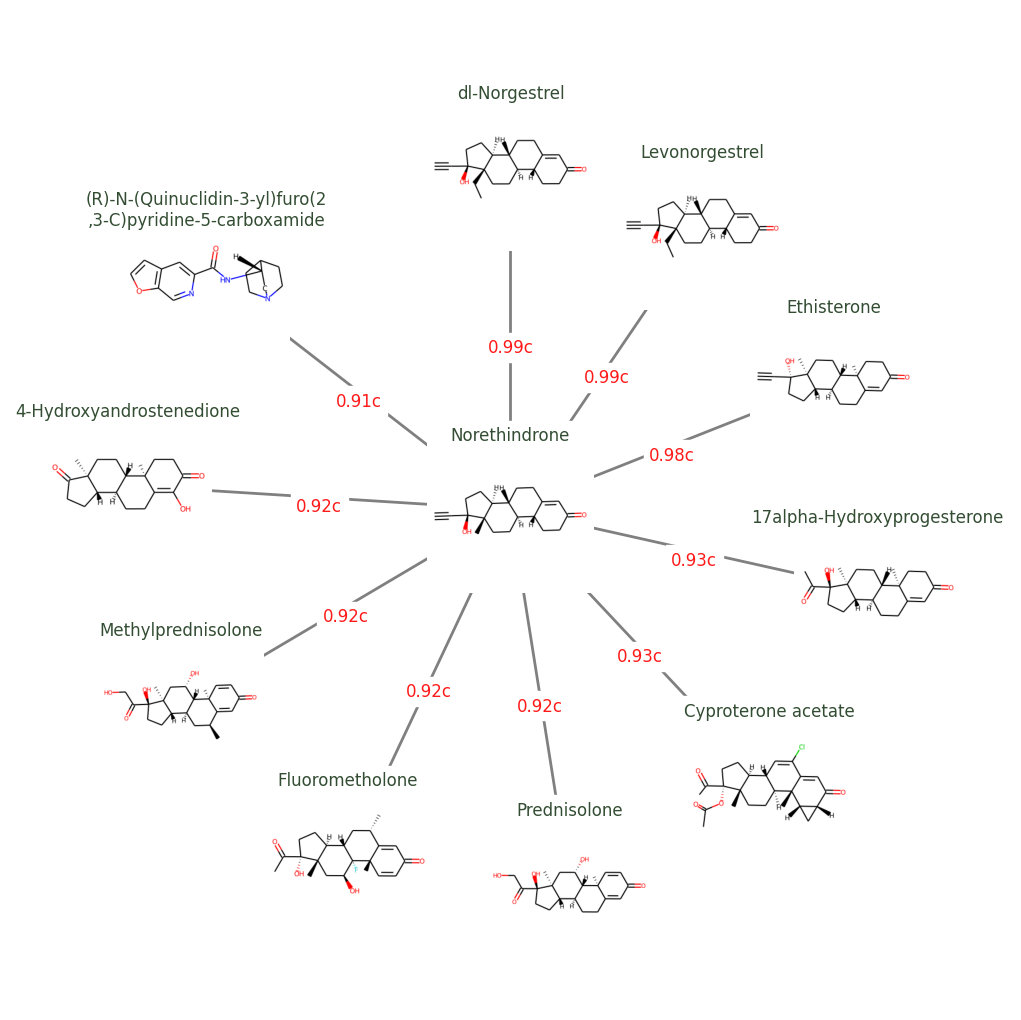

In [65]:
from genra.rax.viz.nn import *

fig = pl.figure(figsize=(13,13))
ax = pl.subplot(1,1,1)
ax.set_axis_off()
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)

target_id = 'DTXSID9023380'
GV = GenRAViewNN(rs=1.2,lw=1,ax=ax,th_tot=1.9*math.pi,
                 chm_name_font_size=12,metric='euclidean',
                   chm_sz=(100,100),r_min=200)
GV.loadData(X,Info.ATG_ERa_TRANS,Info=Info)
GV.draw(target_id,k=10)

In [66]:
GV._NN_c[['chemical_name','ATG_ERa_TRANS']]


,chemical_name,ATG_ERa_TRANS
1,dl-Norgestrel,1
2,Levonorgestrel,1
3,Ethisterone,0
4,17alpha-Hydroxyprogesterone,1
5,Cyproterone acetate,0
6,Prednisolone,0
7,Fluorometholone,1
8,Methylprednisolone,0
9,4-Hydroxyandrostenedione,1
10,"(R)-N-(Quinuclidin-3-yl)furo(2,3-C)pyridine-5-...",0


1 CN1C2=C(NC=N2)C(=O)N(C)C1=O 1.4976663446391062e-14 244.5874754552643
2 CN1C=NC2=C1C(=O)NC(=O)N2C 139.35479850977939 205.05435905223558
3 CN1C(COC(N)=O)=NC=C1[N+]([O-])=O 233.53589361848879 92.46340134316475
4 CN1C=NC2=C1C(=O)N(C)C(=O)N2 246.43326543324903 -55.08436109115371
5 CN(C)NC(=O)CCC(O)=O 174.67936165969525 -186.01462690455267
6 CC1(C)CC2=C(O1)C(O)=CC=C2 40.25290172582032 -254.14681924146362
7 O=C1CC2CC1C1CCCC21 -109.56892528683868 -232.84581865111198
8 Cl.CCOC(=O)NNC1=NN=CC2=CC=CC=C12 -221.58578767001336 -131.04546952159936
9 CC1=NN(C(=O)C1)C1=CC=C(C=C1)S(O)(=O)=O -257.0084773288035 16.169602832508737
10 CC1=CC(O)=CC=C1 -203.53770106339528 157.88002444101667


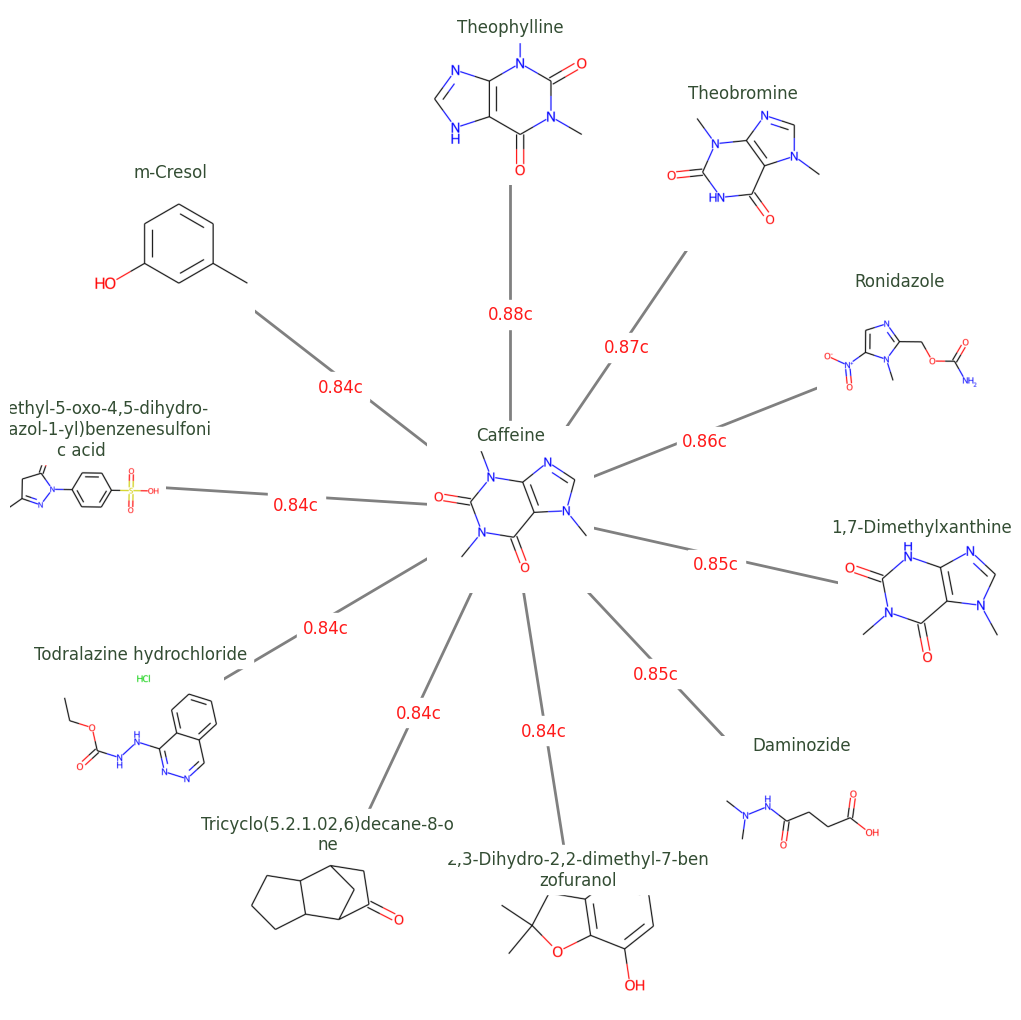

In [75]:
from genra.rax.viz.nn import *

fig = pl.figure(figsize=(13,13))
ax = pl.subplot(1,1,1)
ax.set_axis_off()
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)

target_id = 'DTXSID0020232'
GV = GenRAViewNN(rs=1.2,lw=1,ax=ax,th_tot=1.9*math.pi,
                 chm_name_font_size=12,metric='euclidean',
                   chm_sz=(100,100),r_min=200)
GV.loadData(X,Info.ATG_ERa_TRANS,Info=Info)
GV.draw(target_id,k=10)

In [59]:
GV._NN_c[['chemical_name','ATG_ERa_TRANS']]

,chemical_name,ATG_ERa_TRANS
1,Theophylline,0
2,Theobromine,0
3,Ronidazole,0
4,"1,7-Dimethylxanthine",0
5,Daminozide,0
6,"2,3-Dihydro-2,2-dimethyl-7-benzofuranol",0
7,"Tricyclo(5.2.1.02,6)decane-8-one",1
8,Todralazine hydrochloride,0
9,"4-(3-Methyl-5-oxo-4,5-dihydro-1H-pyrazol-1-yl)...",0
10,m-Cresol,0


In [77]:
', '.join(GV._NN_c[['chemical_name','ATG_ERa_TRANS']].chemical_name.str.lower().iloc[:10])

'theophylline, theobromine, ronidazole, 1,7-dimethylxanthine, daminozide, 2,3-dihydro-2,2-dimethyl-7-benzofuranol, tricyclo(5.2.1.02,6)decane-8-one, todralazine hydrochloride, 4-(3-methyl-5-oxo-4,5-dihydro-1h-pyrazol-1-yl)benzenesulfonic acid, m-cresol'

1 CCC(C)(C1=CC=C(O)C=C1)C1=CC=C(O)C=C1 1.2676677250765501e-14 207.02585038545803
2 CC(C1=CC=C(O)C=C1)C1=CC=C(O)C=C1 145.87108476651542 157.8024504610019
3 CC(C)CC(C)(C1=CC=C(O)C=C1)C1=CC=C(O)C=C1 218.25705678824818 17.177202895752806
4 CC(C)(C)C1=CC(O)=CC=C1O 175.64116504474768 -138.46432981774822
5 OC1=CC2=C(CC3=CC=CC=C23)C=C1 35.145267459876905 -221.89848565845725
6 OC1=C(CC2=C(O)C=CC=C2)C=CC=C1 -125.1956059734604 -187.3684653602789
7 OC1=CC=C(Cl)C=C1CC1=CC(Cl)=CC=C1O -219.1355233738333 -52.609784521961586
8 CC\C(=C(\CC)C1=CC=C(O)C=C1)C1=CC=C(O)C=C1 -196.72845539703997 110.17322868488466


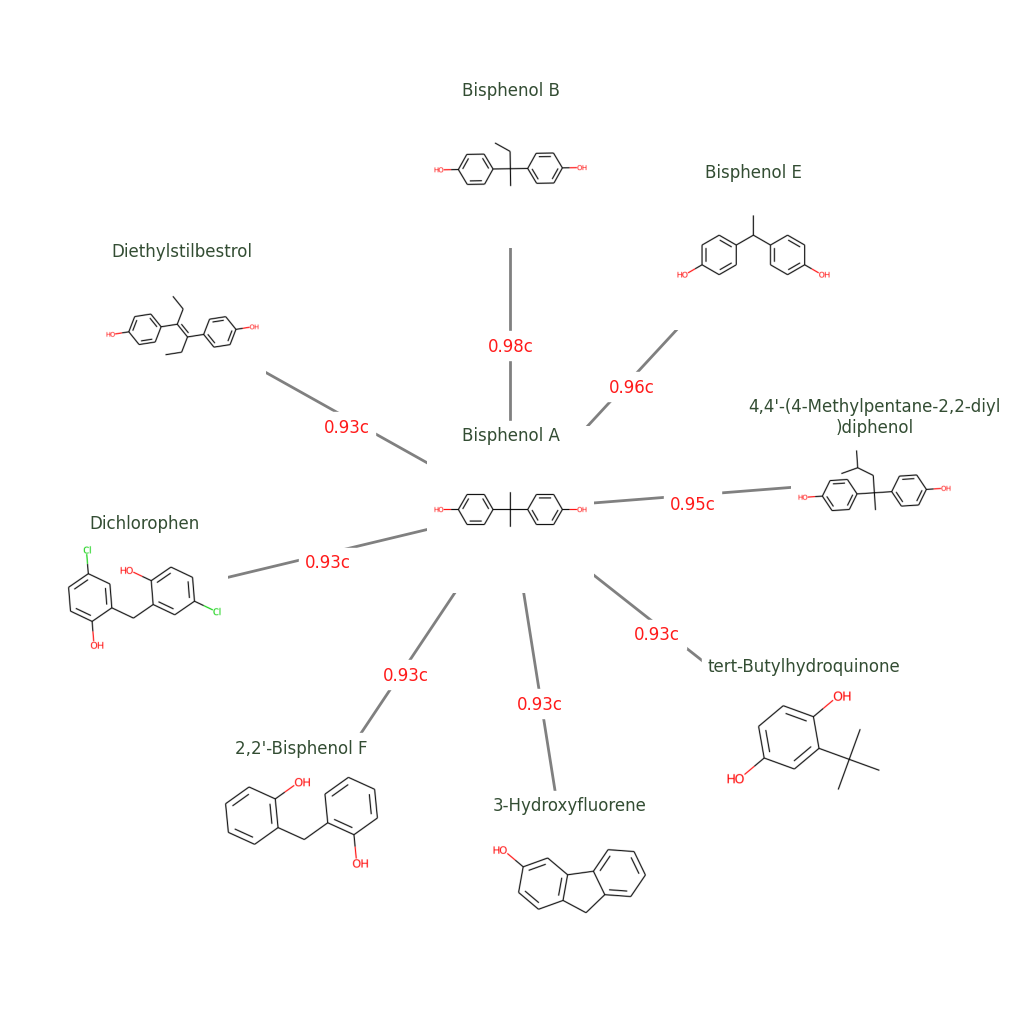

In [73]:
from genra.rax.viz.nn import *

fig = pl.figure(figsize=(13,13))
ax = pl.subplot(1,1,1)
ax.set_axis_off()
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)

target_id = 'DTXSID7020182'
GV = GenRAViewNN(rs=1.2,lw=1,ax=ax,th_tot=1.9*math.pi,
                 chm_name_font_size=12,metric='euclidean',
                   chm_sz=(100,100),r_min=200)
GV.loadData(X,Info.ATG_ERa_TRANS,Info=Info)
GV.draw(target_id,k=8)

In [55]:
GV._NN_c[['chemical_name','ATG_ERa_TRANS']]

,chemical_name,ATG_ERa_TRANS
1,Bisphenol B,1
2,Bisphenol E,1
3,"4,4'-(4-Methylpentane-2,2-diyl)diphenol",1
4,tert-Butylhydroquinone,1
5,3-Hydroxyfluorene,1
6,"2,2'-Bisphenol F",1
7,Dichlorophen,1
8,Diethylstilbestrol,1


In [74]:
', '.join(GV._NN_c[['chemical_name','ATG_ERa_TRANS']].chemical_name.iloc[:8])

"Bisphenol B, Bisphenol E, 4,4'-(4-Methylpentane-2,2-diyl)diphenol, tert-Butylhydroquinone, 3-Hydroxyfluorene, 2,2'-Bisphenol F, Dichlorophen, Diethylstilbestrol"

In [ ]:
T3 = T2[N1.index[:10]].loc[[i for i in GV._NNi.ID if i in T2.index]].reset_index()\
                .merge(CHM_info[['ID','chemical_name']],on='ID').drop('ID',axis=1)\
                .set_index('chemical_name')
T3 = T3.drop('1-Chloro-4-nitrobenzene',axis=0).T
T3.rename(columns=dict(Nitrofen='Nitrofen (predicted)'),inplace=True)
#A3 = pd.DataFrame(np.zeros(T3.shape),index=T3.index,columns=T3.columns)
#A3['Nitrofen'] = 
g = sns.heatmap(T3,lw=1,cmap=cm.Greys,vmax=2,cbar=False,square=True)
n = T3.shape[0]
sc=g.axes.scatter(0.5*np.ones(n),np.arange(n)+0.5,s=50,
               c=P_target.loc[T3.index].test_f1_score,
               cmap=cm.Reds,vmin=0,vmax=1
              )
pl.colorbar(sc,label='$F_1$')
g.set(xlabel='')
